In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
#importing our dataset
da = pd.read_csv("datasets_19_420_Iris.csv")

In [9]:
# dropping the 'species' column
da.drop(["Species"], axis = 1, inplace = True)

In [10]:
#exploring columns
da.columns

Index([u'Id', u'SepalLengthCm', u'SepalWidthCm', u'PetalLengthCm',
       u'PetalWidthCm'],
      dtype='object')

In [11]:
#here we describe our data
da.describe


<bound method DataFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
5      6            5.4           3.9            1.7           0.4
6      7            4.6           3.4            1.4           0.3
7      8            5.0           3.4            1.5           0.2
8      9            4.4           2.9            1.4           0.2
9     10            4.9           3.1            1.5           0.1
10    11            5.4           3.7            1.5           0.2
11    12            4.8           3.4            1.6           0.2
12    13            4.8           3.0            1.4           0.1
13    14            4.3   

In [12]:
# data type of each column
da.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [13]:
# how many rows and columns?
da.shape

(150, 5)

In [15]:
# to print first rows of data
da.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


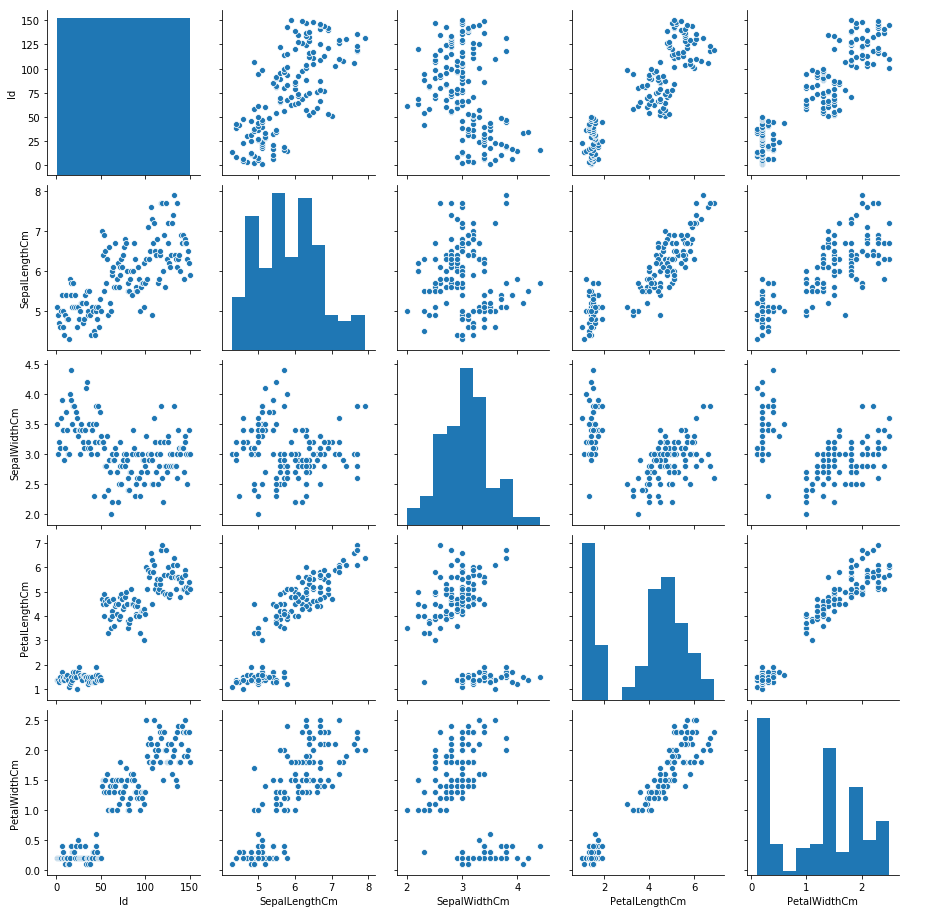

In [16]:
# pairplot construction
sns.pairplot(da)


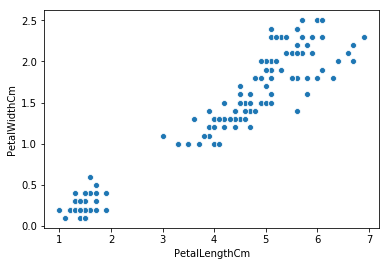

In [17]:
# scatterplot between petallength and petal width
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", data=da)

In [26]:
# we build k-means clustering
## we get centroids of each cluster for better analysis
kmeans = KMeans(n_clusters=3).fit(da)
centroids = kmeans.cluster_centers_
print(centroids)

[[125.5     6.588   2.974   5.552   2.026]
 [ 25.5     5.006   3.418   1.464   0.244]
 [ 75.5     5.936   2.77    4.26    1.326]]


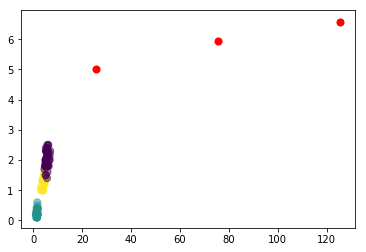

In [27]:
# constructing scatterplot
plt.scatter(da['PetalLengthCm'], da['PetalWidthCm'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

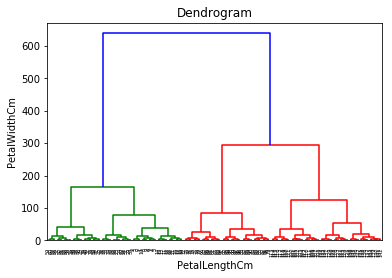

In [28]:
#constructing dendrogram
dendrogram = sch.dendrogram(sch.linkage(da, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

In [29]:
#calculation pearson correlation
pearsoncorr = da.corr(method='pearson')
pearsoncorr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000
